In [2]:
import sys
import pickle 

sys.path.append(sys.path[0] + "/..")  # Adds higher directory to python modules path.

import numpy as np
from Functions import renormalize, scomplex
import matplotlib.pyplot as plt
import networkx as nx
import powerlaw as pwl
import seaborn as sns
import scipy
plt.rcParams["text.usetex"] = True

import matplotlib.colors as mcolors

from matplotlib.colors import LinearSegmentedColormap

colors = ["#003F5C","#2F4B7C","#665191","#A05195","#D45087","#F95D6A","#FF7C43","#FFA600"]
colors_sequential = colors + colors + colors + colors 
colors = ["#02405c", "#fea600", "#a20655", "#5e96c5", "#4b3596", "#fa6ca9", "#8d6cf6"]
colors_curves = colors+ colors+ colors+ colors


## Generate Simplicial Complex

In [3]:
# Network Geometry with Flavor parameters
d = 3
s = 1
N = 3000
beta = 5
m = 1

# Number of repetitions
nrep = 10

taumin = -3 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval



In [4]:
for d in [3]:
    print(f"DIMENSION: {d}")
    if d == 1:
        laplacians_types = ["01"]
    else:
        laplacians_types = ["01"]+[f"{l}{d}" for l in range(d)]#+[f"{d}{d-1}"]
        
    names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]

    sp_heats = []
    for n in range(nrep):
        sc = scomplex.NGF(d,N,s,beta,m)
        print(f"rep: {n}/{nrep}")
        for i,l in enumerate(laplacians_types):
            print(l)
            L = scomplex.diffusion_laplacian(sc, k=int(l[0]), l=int(l[1]),sparse = False)
            #nn = L.shape[0]-1
            #D,_ = scipy.sparse.linalg.eigsh(L.asfptype(),nn,which = "LM", sigma = 0)
            #D = np.append(D,[np.max(D) for idx in range(L.shape[0]-nn)])
            D,__ = scipy.linalg.eigh(L)
            specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
            #specific_heat,tau_space = compute_spectral_d(D,taumin,taumax,ntau)
            if n == 0:
                sp_heats.append([specific_heat])
            else:
                sp_heats[i].append(specific_heat)

    with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/Data/d{d}s{s}b5_{nrep}rep_{N}nodes.pickle', 'wb') as handle:
        pickle.dump(sp_heats, handle, protocol=pickle.HIGHEST_PROTOCOL)         
    #f,ax = plt.subplots(1,1,figsize = (7,4))
    #for i in range(len(Laplacians)):
    #    ax.loglog(tau_space,sp_heats[i])
    #ax.set_ylim([10**-1,10])
    #ax.set_xlim([10**taumin,10**taumax])
    #ax.legend(names)
    #plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/d{d}s{s}_{nrep}rep.png')
        

DIMENSION: 3
rep: 0/10
01


/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/higher_order_LRG/HOLR/Experiments_setups/../Functions/renormalize.py:28: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


03
13


In [106]:
with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/Data/d{d}s{s} _{nrep}rep_{N}nodes.pickle', 'wb') as handle:
    pickle.dump(sp_heats, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
# Load data (deserialize)
d = 4
s = 1
nrep = 50
N = 1000
with open(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/Data/d{d}s{s}_{nrep}rep_{N}nodes.pickle', 'rb') as handle:
    sp_heats = pickle.load(handle)

if d == 1:
        laplacians_types = ["01"]
else:
    laplacians_types = ["01"]+[f"{l}{d}" for l in range(d)]

taumin = -2
taumax = 5
ntau = 100
tau_space = np.logspace(taumin,taumax,ntau)[:ntau-1]
#laplacians_types = ["01","04","14","24","34"]


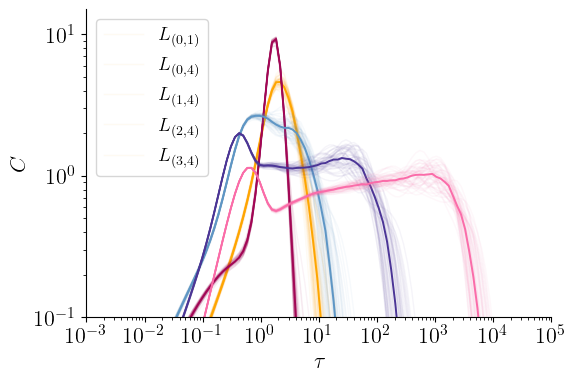

In [3]:
names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]
f,ax = plt.subplots(1,1,figsize = (6,4))
for i in range(len(laplacians_types)):
    alph = 0.05
    for n in range(nrep):
        ax.loglog(tau_space,sp_heats[i][n],color = colors_curves[i+1],linewidth = 1,alpha = alph)

    ax.loglog(tau_space,np.median(sp_heats[i],0),color = colors_curves[i+1],linewidth = 1.4,alpha = 1)
ax.set_ylim([10**-1,15])
ax.set_xlim([10**-3,10**taumax])
ax.legend(names,fontsize = 14)
ax.set_xlabel(r"$\tau$",fontsize = 16)
ax.set_ylabel(r"$C$",fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#ax.hlines(y = 0.8,xmin=1,xmax = 700,linestyles='--',color = [0.5,0.5,0.5])
sns.despine()

#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/d{d}s{s}_{nrep}rep.pdf')


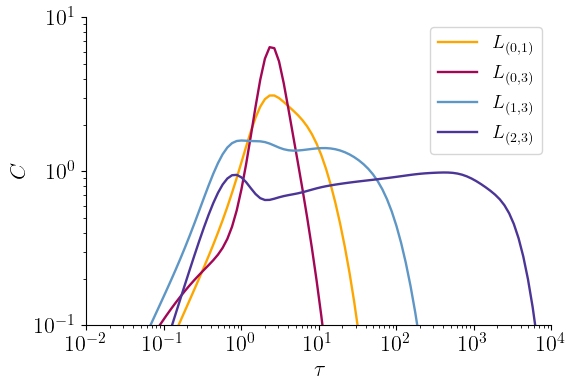

In [107]:
names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]
f,ax = plt.subplots(1,1,figsize = (6,4))
for i in range(len(laplacians_types)):
    if i != 3:
        alph = 1
    else:
        alph = 1

    ax.loglog(tau_space,sp_heats[i],color = colors_curves[i+1],linewidth = 1.7,alpha = alph)
    
ax.set_ylim([10**-1,10])
ax.set_xlim([10**-2,10**taumax])
ax.legend(names,fontsize = 14)
ax.set_xlabel(r"$\tau$",fontsize = 16)
ax.set_ylabel(r"$C$",fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#ax.hlines(y = 0.8,xmin=1,xmax = 700,linestyles='--',color = [0.5,0.5,0.5])
sns.despine()

plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/d{d}s{s}_{nrep}rep_scalefree_relations.pdf')


IndexError: list index out of range

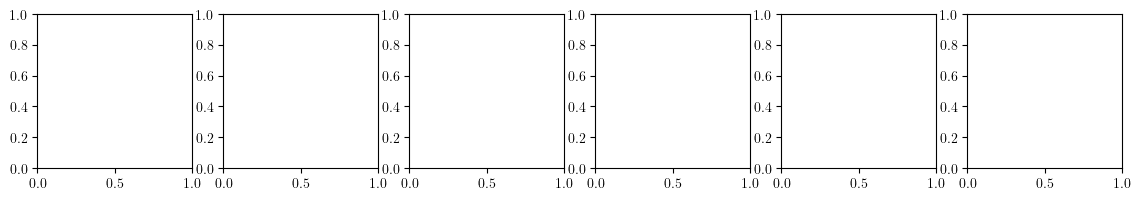

In [6]:
# Plot eigenvalues distributions

names = [f"$L_{{({int(l[0])},{int(l[1])})}}$" for l in laplacians_types]
f,ax = plt.subplots(1,len(laplacians_types),figsize = (14/6*len(laplacians_types),2))
for i in range(len(Laplacians)):
    pwl.plot_pdf(eigs[i][eigs[i]>0],ax = ax[i])
    if 3 <= i and i <= 4:
        ax[i].set_ylim([10**-4,1])
        ax[i].set_xlim([10**-4,10**2.5])
    else: 
        ax[i].set_ylim([10**-4,1])
        ax[i].set_xlim([10**-3,10**3])
        
    ax[i].set_title(names[i])

#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Eigenvalues/NGF/d{d}s{s}_{nrep}rep_2.png')

## Renormalize

In [156]:
N = 1400
s = 1
m = 1
sc = scomplex.NGF(d,N,s,beta,m)


In [194]:
lmax = 4
diff_order = 1
int_order = 2
tau = 0.8
PLOT = False # Plotting might be very slow
VERBOSE = True

sequence = renormalize.renormalize_steps(sc,lmax = lmax,tau = tau, diff_order = diff_order, int_order = int_order, PLOT = PLOT, VERBOSE = VERBOSE, SAVENAME = None)


1400
1103
1035
1019


In [195]:
taumin = -3
taumax = 5
ntau = 100
nodes = np.zeros(lmax)
Ds = []
spheats = []
for i in range(lmax):
    scc = sequence[i]
    nodes[i] = scc["n0"]
    Lnew = scomplex.diffusion_laplacian(scc, diff_order, int_order)

    Dnew, Unew = np.linalg.eigh(Lnew)
    Ds.append(Dnew)
    specific_heat,tau_space, __ = renormalize.compute_heat(Dnew,taumin,taumax,ntau)
    spheats.append(specific_heat)


/Users/marconurisso/Desktop/Work/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


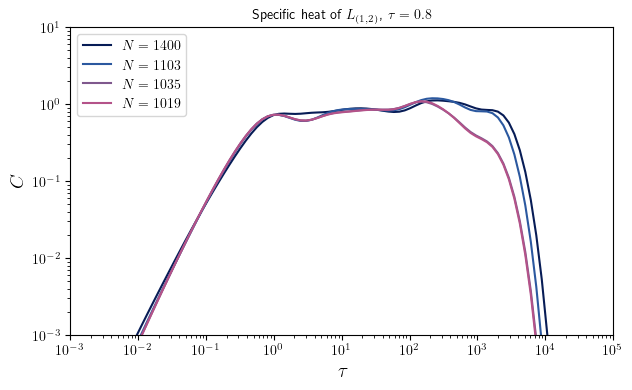

In [196]:
f,ax = plt.subplots(1,1,figsize = (7,4))
for i in range(lmax):
    ax.loglog(tau_space,spheats[i],color = colors[2*i])

ax.set_ylim([10**-3,10**1])
ax.set_xlim([10**taumin,10**taumax])
ax.legend([f"$N = {int(nodes[i])}$" for i in range(lmax)])
ax.set_xlabel(r"$\tau$",fontsize = 14)
ax.set_ylabel("$C$",fontsize = 14)
ax.set_title(f"Specific heat of $L_{{({diff_order},{int_order})}}$,  " + r"$\tau" +f"= {tau}$")
plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_Curves/NGF/d{d}s{s}_renormalizedwith_{diff_order}{int_order}.pdf')

## Compute heat increasing number of nodes

In [16]:
d = 2
Ns = [500,400,300,200]
s = 1
beta = 0.5
m = 1

laplacians_type = "12"

nrep = 5

# Compute eigenvalues of the Laplacians and their specific heat curves
taumin = -3 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 100 # Number of taus to consider in the interval

sp_heats = []
nodes = []

for n in range(nrep):
    for i in range(len(Ns)):
        sc = scomplex.NGF(d,Ns[i],s,beta,m)
        L = scomplex.diffusion_laplacian(sc, k=int(laplacians_type[0]), l=int(laplacians_type[1]))
        D,U = np.linalg.eigh(L)
        specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
        if n == 0:
            sp_heats.append(specific_heat/nrep)
        else:
            sp_heats[i] += specific_heat/nrep


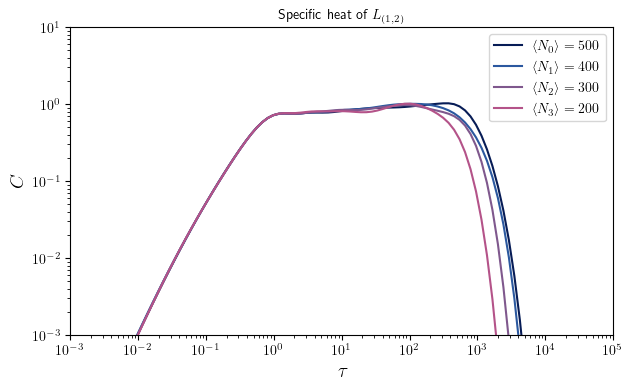

In [17]:
f,ax = plt.subplots(1,1,figsize = (7,4))
for i in range(lmax):
    ax.loglog(tau_space,sp_heats[i],color = colors[2*i])

ax.set_ylim([10**-3,10**1])
ax.set_xlim([10**taumin,10**taumax])
ax.legend([r"$\langle N_" + f"{i}" + r"\rangle " + f"= {Ns[i]}$" for i in range(len(Ns)) ])

ax.set_xlabel(r"$\tau$",fontsize = 14)
ax.set_ylabel("$C$",fontsize = 14)
ax.set_title(f"Specific heat of $L_{{({int(laplacians_type[0])},{int(laplacians_type[1])})}}$")
plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_Curves/NGF/d{d}s{s}_generate_{int(laplacians_type[0])}{int(laplacians_type[1])}.pdf')

## Compute heat and renormalize multiple iterations

In [11]:
# Define strings which specify the Laplacians to consider
#laplacians_types = ["01","10"]
d = 2
N = 100
s = 1
beta = 1
m = 1

laplacians_type = "12"
tau = 0.6

lmax =4

nrep = 1

 # Compute eigenvalues of the Laplacians and their specific heat curves
taumin = -3 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 100 # Number of taus to consider in the interval

sp_heats = []
nodes = []

for n in range(nrep):
    sc = scomplex.NGF(d,N,s,beta,m)
    print(n)
    sequence = renormalize.renormalize_steps(sc,lmax = lmax,tau = tau, diff_order = int(laplacians_type[0]), int_order = int(laplacians_type[1]), PLOT = False, VERBOSE = True, SAVENAME = None)

    for i in range(lmax):
        L = scomplex.diffusion_laplacian(sequence[i], k=int(laplacians_type[0]), l=int(laplacians_type[1]))
        D,U = np.linalg.eigh(L)
        specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
        if n == 0:
            nodes.append(sequence[i]["n0"]/nrep)
            sp_heats.append(specific_heat/nrep)
        else:
            sp_heats[i] += specific_heat/nrep
            nodes[i] += sequence[i]["n0"]/nrep



0
100
83
81
81


/Users/marconurisso/Desktop/Work/Simplicial_Renormalization/HodgeLaplacianRenorm/hodge_renormalization/Hodge_renorm/Experiments_setups/../Functions/renormalize.py:305: RuntimeWarning: overflow encountered in exp
  mu[i] = 1 / np.sum(np.exp(-tau * (D - D[i])))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Text(0.5, 1.0, 'Specific heat of $L_{(1,2)}$,  $\\tau= 0.6$')

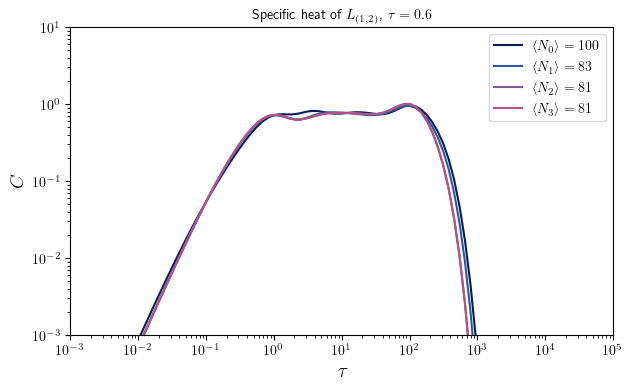

In [12]:
f,ax = plt.subplots(1,1,figsize = (7,4))
for i in range(lmax):
    ax.loglog(tau_space,sp_heats[i],color = colors[2*i])

ax.set_ylim([10**-3,10**1])
ax.set_xlim([10**taumin,10**taumax])
ax.legend([r"$\langle N_" + f"{i}" + r"\rangle " + f"= {int(nodes[i])}$" for i in range(lmax) ])

ax.set_xlabel(r"$\tau$",fontsize = 14)
ax.set_ylabel("$C$",fontsize = 14)
ax.set_title(f"Specific heat of $L_{{({int(laplacians_type[0])},{int(laplacians_type[1])})}}$,  " + r"$\tau" +f"= {tau}$")
#plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_Curves/NGF/d{d}s{s}_renormalizedwith_{int(laplacians_type[0])}{int(laplacians_type[1])}.pdf')

## Increase N

In [40]:
#steps_list = [2,3,4,5,6,7]
steps_list = [300,600,900,1200,1500,1800]
nrep = 10
taumin = -1.2
taumax = 4.2
ntau = 100

sp_heats = []
for i in range(len(steps_list)):
    print(steps_list[i])
    for n in range(nrep):
        # Pseudofractal (2,1)
        # edges = [(0,1),(1,2),(0,2)]
        # n = 3
        # steps = s
        # for s in range(steps):
        #     boundary = edges.copy()
        #     for ed in boundary:
        #         edges.append((ed[0],n))
        #         edges.append((ed[1],n))
        #         n += 1

        # G = nx.from_edgelist(edges)
        # sc = scomplex.convert_graph_to_sc(G,dim = 2)
        sc = scomplex.NGF(2,steps_list[i],1,0.1,1)
        L = scomplex.diffusion_laplacian(sc, k=1, l=2)
        D,U = np.linalg.eigh(L)
        specific_heat,tau_space, __ = renormalize.compute_heat(D,taumin,taumax,ntau)
        if n == 0:
            sp_heats.append(specific_heat/nrep)
        else: 
            sp_heats[i] += specific_heat/nrep


300
600
900
1200
1500
1800


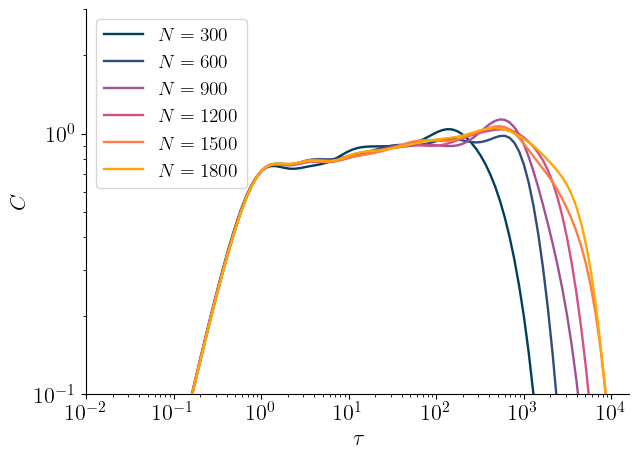

In [41]:

#names = [f"${l}$ steps" for l in steps_list]
names = [f"$N = {l}$" for l in steps_list]

f,ax = plt.subplots(1,1,figsize = (7,5))
for i in range(len(steps_list)):
    ax.loglog(tau_space,sp_heats[i],color = colors_sequential[int(np.floor(1.5*i))],linewidth = 1.7)
ax.set_ylim([10**-1,3])
ax.set_xlim([10**-2,10**taumax])
ax.legend(names,fontsize = 14)
ax.set_xlabel(r"$\tau$",fontsize = 16)
ax.set_ylabel(r"$C$",fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#ax.hlines(y = 1,xmin=5,xmax = 800,linestyles='--',color = [0.5,0.5,0.5])
sns.despine()

plt.savefig(f'../Experiments_results/Diffusion_Laplacians/Heat_curves/NGF/d2s1_L12_increaseN_4rep.pdf')